### Target: FNGU - Tech, [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf) - Weed stonks, or [XEG](https://www.blackrock.com/ca/investors/en/products/239839/ishares-sptsx-capped-energy-index-etf) - Candian OIL

Get the least spearman correlated features with the target and use ICA for *compress* the feature space, and add on the most spearman correlated features. This is an **alternative** to getting rid of potentially useful information.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# !pip install yfinance
import yfinance as yf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime
 
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

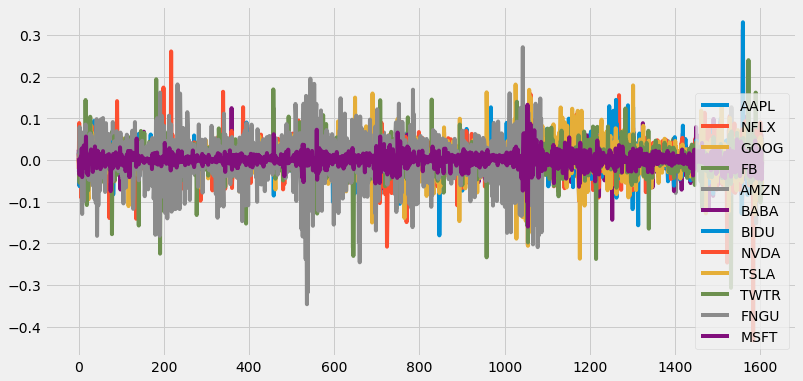

In [2]:
USE_LOG_RETURN = True

# ls = ['HMMJ,'ogi','hexo','cweb','smg','apha','gwprf','tlry','acb','cron','weed.TO'] # ,'weed'
# ls = ['XEG.to', 'SU.to','CNQ.to','CVE.to','TOU.to','IMO.to', ,'PXT.to','CPG.to','PSK.to','ARX.to','WCP.to'] # 'PXT.to' and after are less weighted in XEG - which is market cap weighted
ls = ['AAPL','NFLX','GOOG','FB','AMZN','BABA','BIDU','NVDA','TSLA','TWTR','FNGU', 'MSFT'] # ,'weed'


data = {} 

for i in ls:
  arry= yf.download(i, start, end)

  if USE_LOG_RETURN:
    data[i] =  pd.Series(np.diff(np.log(arry["Adj Close"])))
  else:
    data[i] = arry["Adj Close"]

stocks = pd.DataFrame(data)

# stocks=stocks.dropna()
stocks.plot(grid = True)

In [3]:
np.sum(stocks.isna())
stocks.shape
stocks.dropna(inplace=True)
stocks.shape
stocks.head(5)

AAPL      0
NFLX      0
GOOG      0
FB        0
AMZN      0
BABA      0
BIDU      0
NVDA      0
TSLA      0
TWTR      0
FNGU    517
MSFT      0
dtype: int64

(1606, 12)

(1089, 12)

,AAPL,NFLX,GOOG,FB,AMZN,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
0,-0.025379,-0.021139,0.000997,0.004977,-0.005036,0.024982,0.017986,0.015936,0.000090,-0.028779,-0.002056,0.004551
1,-0.019763,0.088991,0.001400,0.002333,-0.001800,-0.016671,-0.009438,-0.042229,-0.019844,-0.024476,-0.000749,-0.018332
2,-0.043121,-0.026870,-0.023443,-0.050287,-0.039841,-0.061466,-0.062468,-0.040452,-0.015598,-0.054275,0.079351,-0.035402
3,0.005274,-0.028061,-0.016546,-0.006044,-0.001465,-0.026757,-0.017530,-0.021700,-0.021799,-0.013917,0.016980,0.003063
4,0.016063,0.031634,0.002181,0.001848,0.017457,-0.012507,-0.005677,0.001686,-0.015041,-0.016654,-0.028462,-0.000574


In [4]:
if not USE_LOG_RETURN:
    roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
    roi = round(roi*100)
    roi = pd.DataFrame(roi)
    roi.transpose()
    roi.plot.bar()

<AxesSubplot:>

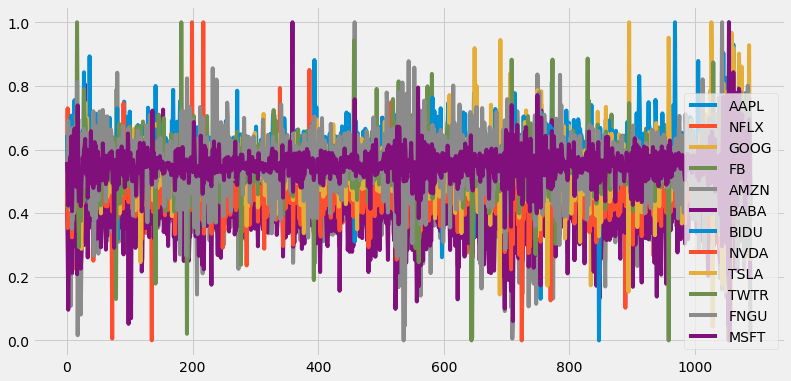

In [5]:
def normIt(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = normIt(stocks)
stocks_norm.plot()

# Selecting the most correlated


In [6]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns, index=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,AAPL,NFLX,GOOG,FB,AMZN,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
AAPL,1.000000,0.432890,0.592742,0.502420,0.542982,0.503045,0.489248,0.518606,0.312845,0.372642,0.035658,0.597297
NFLX,1.432890,1.432890,1.078645,0.976604,1.074720,0.920778,0.898398,0.978736,0.619844,0.713090,0.107360,1.083513
GOOG,2.025633,1.918793,2.078645,1.671501,1.732136,1.471644,1.421310,1.500383,0.929237,1.124447,0.200344,1.771603
FB,2.528052,2.392977,2.773542,2.671501,2.328920,1.993680,1.874603,1.966886,1.237225,1.547184,0.261857,2.334822
AMZN,3.071034,2.924716,3.430958,3.268285,3.328920,2.499387,2.343682,2.489576,1.574525,1.934671,0.335794,2.972853
BABA,3.574079,3.342449,3.981823,3.790321,3.834626,3.499387,2.970064,3.008374,1.910279,2.336454,0.367423,3.473417
BIDU,4.063327,3.751599,4.504735,4.243614,4.303705,4.125769,3.970064,3.480214,2.225359,2.684151,0.360832,3.936283
NVDA,4.581934,4.211729,5.026382,4.710117,4.826396,4.644567,4.441904,4.480214,2.604402,3.073649,0.397270,4.471769
TSLA,4.894779,4.518728,5.335776,5.018104,5.163696,4.980321,4.756984,4.859257,3.604402,3.378376,0.457575,4.793695
TWTR,5.267421,4.859175,5.747132,5.440841,5.551183,5.382104,5.104681,5.248755,3.909129,4.378376,0.492444,5.184413


In [7]:
corrwith = stocks_norm.corr()
corr_cumSum = corrwith.cumsum()
corr_cumSum

,AAPL,NFLX,GOOG,FB,AMZN,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
AAPL,1.000000,0.460358,0.687272,0.566270,0.577719,0.540313,0.484719,0.560276,0.377827,0.387055,0.014007,0.722174
NFLX,1.460358,1.460358,1.223573,1.025066,1.156042,0.978214,0.887333,1.005398,0.703718,0.723518,0.063664,1.251316
GOOG,2.147630,1.996659,2.223573,1.719456,1.830548,1.545130,1.395527,1.572985,1.074618,1.159478,0.128312,2.040091
FB,2.713900,2.455455,2.917962,2.719456,2.437709,2.040449,1.822636,2.067866,1.406950,1.543846,0.156876,2.677739
AMZN,3.291619,3.033777,3.592469,3.326617,3.437709,2.575754,2.247826,2.578799,1.756844,1.898831,0.205370,3.352325
BABA,3.831933,3.471678,4.159385,3.821936,3.973015,3.575754,2.841775,3.105110,2.095057,2.259860,0.237338,3.906333
BIDU,4.316651,3.874292,4.667579,4.249044,4.398205,4.169703,3.841775,3.546756,2.447371,2.575549,0.220361,4.387638
NVDA,4.876927,4.319414,5.235166,4.743925,4.909137,4.696014,4.283420,4.546756,2.812100,2.947384,0.272386,4.991765
TSLA,5.254755,4.645305,5.606066,5.076257,5.259032,5.034228,4.635733,4.911485,3.812100,3.239943,0.338331,5.395187
TWTR,5.641809,4.981768,6.042025,5.460626,5.614016,5.395257,4.951422,5.283320,4.104658,4.239943,0.368208,5.831575


In [8]:
stocks_norm_spearmanr_cumSum.sort_values("MSFT", inplace=True, axis=1)
top_N = stocks.columns.shape[0] // 3

keepThese = stocks_norm_spearmanr_cumSum.iloc[:, -top_N:]
# keepThese = stocks_norm_spearmanr_cumSum.loc[:, stocks_norm_spearmanr_cumSum.iloc[-1] > 6.5] # > 3

keepThese
keepThese = keepThese.columns
if "FNGU" not in keepThese:
#   keepThese.append("FNGU")
    keepThese.append(pd.Index(["FNGU"]))
keepThese

stocks_norm_high_corr = stocks_norm_spearmanr[keepThese]
stocks_norm_high_corr 

,FB,MSFT,AMZN,GOOG
AAPL,0.502420,0.597297,0.542982,0.592742
NFLX,0.976604,1.083513,1.074720,1.078645
GOOG,1.671501,1.771603,1.732136,2.078645
FB,2.671501,2.334822,2.328920,2.773542
AMZN,3.268285,2.972853,3.328920,3.430958
BABA,3.790321,3.473417,3.834626,3.981823
BIDU,4.243614,3.936283,4.303705,4.504735
NVDA,4.710117,4.471769,4.826396,5.026382
TSLA,5.018104,4.793695,5.163696,5.335776
TWTR,5.440841,5.184413,5.551183,5.747132


Index(['FB', 'MSFT', 'AMZN', 'GOOG', 'FNGU'], dtype='object')

Index(['FB', 'MSFT', 'AMZN', 'GOOG'], dtype='object')

,FB,MSFT,AMZN,GOOG
AAPL,0.502420,0.597297,0.542982,0.592742
NFLX,0.474184,0.486216,0.531738,0.485903
GOOG,0.694897,0.688090,0.657416,1.000000
FB,1.000000,0.563219,0.596784,0.694897
AMZN,0.596784,0.638031,1.000000,0.657416
BABA,0.522036,0.500564,0.505706,0.550865
BIDU,0.453292,0.462867,0.469079,0.522912
NVDA,0.466503,0.535485,0.522690,0.521647
TSLA,0.307988,0.321926,0.337300,0.309393
TWTR,0.422737,0.390718,0.387487,0.411357


<AxesSubplot:>

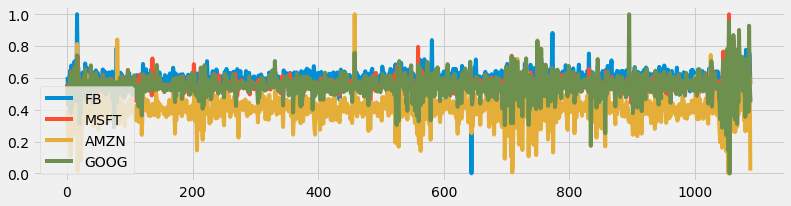

In [9]:
stocks_main = stocks[keepThese]
stocks_main_norm = normIt(stocks_main)
stocks_main_norm.plot(figsize=(12,3))

<AxesSubplot:>

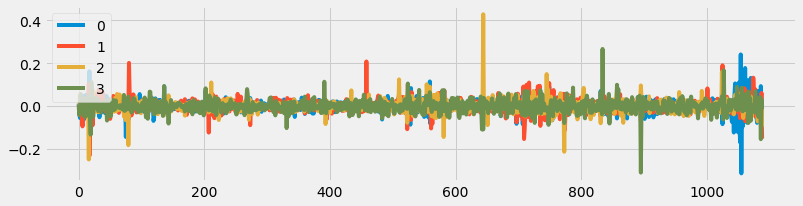

In [10]:
from sklearn.decomposition import FastICA

ica = FastICA(4, max_iter = 900)
stock_ica = ica.fit_transform(stocks_main_norm)
stock_ica = pd.DataFrame(stock_ica)
stock_ica.plot(figsize=(12,3))

<AxesSubplot:>

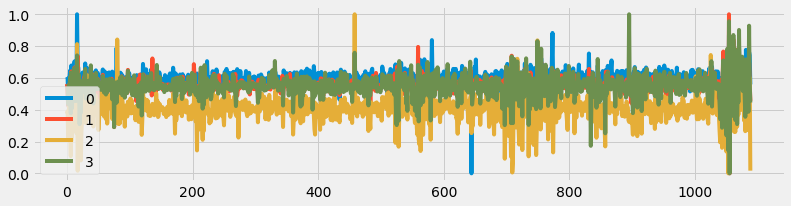

In [11]:
stock_ica = ica.inverse_transform(stock_ica)
stock_ica = pd.DataFrame(stock_ica)
stock_ica.plot(figsize=(12,3))

<AxesSubplot:>

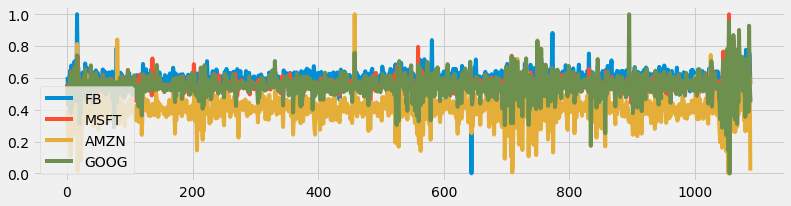

In [12]:
stocks_main_norm.plot(figsize=(12,3))

<AxesSubplot:title={'center':'Illustration of absolute error'}>

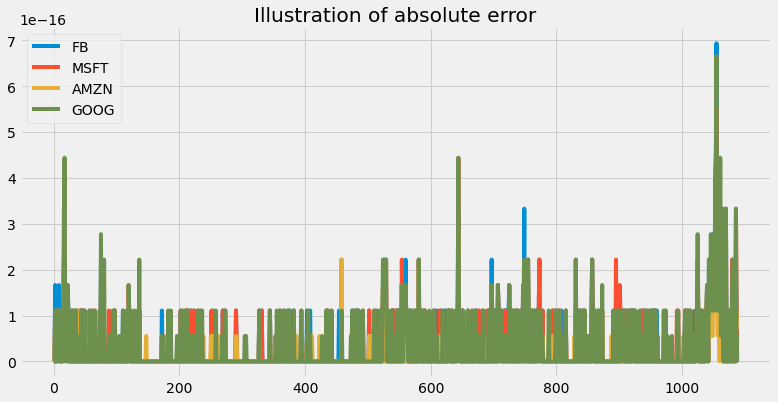

In [13]:
diff = np.abs(stocks_main_norm.values - stock_ica.values)
pd.DataFrame(diff, columns=stocks_main_norm.columns).plot(title="Illustration of absolute error")

# Prediction

not good code. This is the worng notebook for neural network code, the below of written in a single day when I was in my first year of learning


In [14]:
# Run ICA on the non-best-features
all_features = stocks_norm.columns
best_features = stocks_main_norm.columns
not_best_features = list(set(all_features) - set(best_features))

ica = FastICA(4, max_iter = 900)
stock_ica = ica.fit_transform(stocks_norm[not_best_features])
stock_ica = pd.DataFrame(stock_ica)

stock_ica.head(5)

,0,1,2,3
0,0.006248,0.047732,-0.038727,0.055463
1,0.007802,0.047244,-0.037200,0.059000
2,0.008572,0.044590,-0.035775,0.060679
3,0.013749,0.046213,-0.033146,0.057857
4,0.013945,0.043070,-0.032571,0.053434


In [15]:
stocks_main_norm.reset_index(drop=True, inplace=True)
df = pd.concat([stocks_main_norm, stock_ica], axis=1)

print(f"The Original numbers of stocks was {stocks.shape[1]} top N  most correlated stocks is {stocks_main_norm.shape[1]} to which we added {stock_ica.shape[1]} with ICA. Total Features is {df.shape[1]} ")

df.head(5)

The Original numbers of stocks was 12 top N  most correlated stocks is 4 to which we added 4 with ICA. Total Features is 8 


,GOOG,AMZN,FB,FNGU,0,1,2,3
0,0.095071,0.009591,0.252944,0.066584,0.006248,0.047732,-0.038727,0.055463
1,0.092259,0.007488,0.242097,0.066347,0.007802,0.047244,-0.037200,0.059000
2,0.095267,0.016034,0.245700,0.066261,0.008572,0.044590,-0.035775,0.060679
3,0.097951,0.026110,0.255463,0.075751,0.013749,0.046213,-0.033146,0.057857
4,0.097823,0.032645,0.239888,0.077882,0.013945,0.043070,-0.032571,0.053434


In [16]:
TARGET = 'FNGU'
y_scaled_train = df[TARGET].values
X_scaled_train = df.drop([TARGET], axis=1).values

split = int(X_scaled_train.shape[0] * 0.9)
print(f'len of all data {X_scaled_train.shape[0]}, len of Split {split}')

train = X_scaled_train[:split]
valid = X_scaled_train[split:]

y_train_ = y_scaled_train[:split]
y_valid_ = y_scaled_train[split:]

print(train.shape)
print(y_train_.shape)
print(valid.shape)
print(y_valid_.shape)

len of all data 1078, len of Split 970
(970, 7)
(970,)
(108, 7)
(108,)


In [17]:
seqLen = 20

x_train,y_train,x_test,y_test = [],[],[],[]
for i in range(seqLen,train.shape[0]):
    x_train.append(train[i-seqLen:i,0])
    y_train.append(y_train_[i])

for z in range(seqLen,valid.shape[0]):
    x_test.append(valid[z-seqLen:z,0])
    y_test.append(y_valid_[z])

x_train, y_train,x_test,y_test = np.array(x_train), np.array(y_train),np.array(x_test),np.array(y_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

x_train.shape
x_test.shape

(950, 20, 1)

(88, 20, 1)

In [18]:
import tensorflow as tf

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
# from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [19]:
tf.keras.backend.clear_session()

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6515442187570375339
xla_global_id: -1
]


In [20]:
def makeModel():
  model = Sequential()

  # model.add(LSTM(100, return_sequences=True, stateful=True, batch_size=1, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(LSTM(32, dropout=0.2, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
  
  model.add(LSTM(32, return_sequences=False))   # recurrent_dropout=0.1 will prevent cuDNN, using TF2
  model.add(Dense(32, activation='elu')) # sigmoid or elu
  model.add(Dense(1))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.002), loss='mean_squared_error') # metrics=['mean_squared_error', 'mae']
  return model

In [21]:
epochs = 120
batch_size = 16
callbacks=[]
model = makeModel()

stop = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min', restore_best_weights=True)
callbacks.append(stop)  
# callbacks.append(ModelCheckpoint('./my_model.hdf5', save_best_only=True, monitor='val_loss', mode='min'))
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min'))

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  callbacks=callbacks, validation_split =.1, shuffle=True) # valadation_splite is not random. shuffle=False TODO  stateful=True

Epoch 1/120
54/54 [==============================] - 4s 24ms/step - loss: 0.0143 - val_loss: 0.0120 - lr: 0.0020
Epoch 2/120
54/54 [==============================] - 1s 11ms/step - loss: 0.0101 - val_loss: 0.0148 - lr: 0.0020
Epoch 3/120
54/54 [==============================] - 1s 9ms/step - loss: 0.0097 - val_loss: 0.0526 - lr: 0.0020
Epoch 4/120
54/54 [==============================] - 1s 10ms/step - loss: 0.0088 - val_loss: 0.0475 - lr: 0.0020
Epoch 5/120
52/54 [===========================>..] - ETA: 0s - loss: 0.0090
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.
54/54 [==============================] - 1s 10ms/step - loss: 0.0090 - val_loss: 0.0136 - lr: 0.0020
Epoch 6/120
54/54 [==============================] - 1s 10ms/step - loss: 0.0057 - val_loss: 0.0217 - lr: 0.0010
Epoch 7/120
54/54 [==============================] - 1s 10ms/step - loss: 0.0054 - val_loss: 0.0200 - lr: 0.0010
Epoch 8/120
54/54 [==============================] - 1s 10ms/step - lo

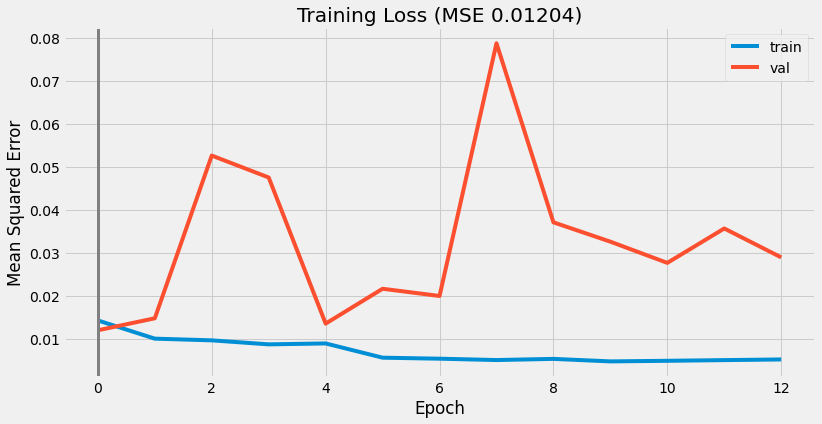

loss 		 0.004820758942514658
val loss 	 0.012043834663927555


In [22]:
# history.history.keys()
_=plt.plot(history.history['loss'])
_=plt.plot(history.history['val_loss'])
_=plt.axvline(stop.best_epoch, linewidth=3, color='gray')
_=plt.title(f'Training Loss (MSE {stop.best:.5f})')
_=plt.ylabel('Mean Squared Error')
_=plt.xlabel('Epoch')
_=plt.legend(['train', 'val'], loc='upper right')
_=plt.show()
print('loss \t\t', min(history.history['loss']))
print('val loss \t', min(history.history['val_loss']))

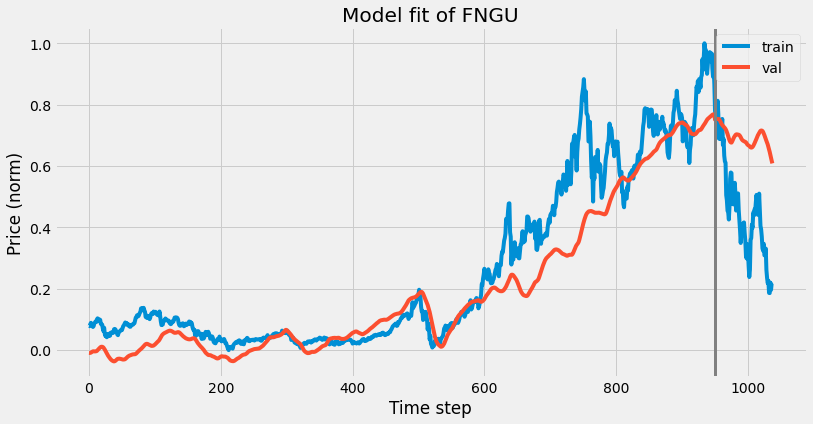

In [23]:
y = np.concatenate([y_train, y_test])

y_a = model.predict(x_train).flatten()
y_b = model.predict(x_test).flatten()
y_hat = np.concatenate([y_a, y_b])

_=plt.figure(figsize=(12,6))
_=plt.plot(y)
_=plt.plot(y_hat)
_=plt.axvline(y_a.shape[0], linewidth=3, color='gray')

_=plt.title(f'Model fit of {TARGET}')
_=plt.ylabel('Price (norm)')
_=plt.xlabel('Time step')
_=plt.legend(['train', 'val'], loc='upper right')

plt.show()

## predicting without neural networks

In [3]:
import numpy as np
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import BayesianRidge

# from fbprophet import Prophet
from sklearn.svm import SVR 
import xgboost

In [6]:
x = np.arange(df.shape[0]).reshape(-1, 1)
x_pred = np.arange(df.shape[0], df.shape[0]+10).reshape(-1, 1)

y = df.values
# y = df["XEG.to"].values 

regs = [DecisionTreeRegressor(),
        AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), loss='square'),
        RandomForestRegressor(200),
        GradientBoostingRegressor(n_estimators=150, max_depth=5),
        BayesianRidge(n_iter=500, tol=0.0015, normalize=True)]
for reg in regs:
  try:
    _ = reg.fit(x, y)
  except:
    print(f'Do only {"XEG.to"}')
    _ = reg.fit(x, stocks_main_norm["XEG.to"].values)

  
  y_pred = reg.predict(x_pred)

  _ = plt.plot(x, y)
  _ = plt.plot(x_pred, y_pred)
  _ = plt.title(str(type(reg)).split(".")[-1][:-2])
  plt.show()

TODO make plots like these https://github.com/akhil2706/Stock-Price-Prediction-using-LSTMs-and-ICA/blob/master/final_project.ipynb

In [5]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
  

model = ARIMA(stocks_main_norm["FNGU"], order=(5,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# residuals.plot(kind='kde')
# pyplot.show()
print(residuals.describe())

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = stocks_main_norm["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test+10)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA to forecast 

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = stocks_main_norm["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print (history==train) #True 
for t in range(len(test)+10):
    model = ARIMA(history[-1*len(test):], order=(5,1,0)) # changed*
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    try:
      obs = test[t]
    except IndexError:
      obs = yhat
	

    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
 
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import numpy as np

#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change = stocks.apply(lambda x: (x) - (x.shift(1))) # shift moves dates back by 1.
stock_change=stock_change.dropna()
stock_change.head()

In [ ]:
stock_change.plot(grid = True,subplots=True)#.axhline(y = 0, color = "black", lw = 2)

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


In [ ]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc

def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = yf.download("FNGU", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

does the PCA of the lesser CORR fetures assist in forcasting an index? 